## Project 5 Diffusion

Due Wed Dec 1, 9am


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from scipy.optimize import curve_fit
"""
This cell implements a diffusion equation for abox of side length 1 formatted
as a 101x101 grid where the initial state has 10 particles at the centre of the
grid. This cell returns an visual representation of this diffusion over time in
the form of an animation.

The main body of this is the for loop which progresses the diffusion for each
time step. The loop saves an image of the diffusion for every 0.2 seconds
passed. For seperately found step values a gaussian function is fitted to the
particles in the centre row of the grid and the standard deviation is saved.
It also saves 30 summations of the particles in the grid that are evenly spaced
in the time evolution.

Finally the animation is produced and saved.
"""

# CONSTANTS =========
D = 0.001
L = 1  # side length of box
N = 101  # gridpoints in one-d
dt = 0.01  # time step
dd = L / N  # postion step

C = np.zeros((N, N))  # grid for particles
Cp = np.zeros((N, N))  # grid copy

# Set particles at the center:
C[N // 2, N // 2] = 10
k = dt / dd / dd * D

# times for standard deviation plotting
times = (((np.arange(30) * np.sqrt(10) / 29)**2) / dt)  # provides even spacing
times = times.astype(int)

tmax = 100  # max time
steps = int(tmax / dt) + 1  # iterations

# FUNCTIONS ==============


def gauss(x, A, sd):
    """
    A guassian function to be used in curve_fit

    Inputs:
        x (float): normally distributed variable
        A (float): amplitude of the curve
        sd (float): standard deviation of the curve
    Outputs:
        The probability distribution in the form of a bell curve
    """
    return A * 1 / (sd * np.sqrt(2 * np.pi)) * np.exp(-1 / 2 *
                                                      ((x - N / 200) / sd)**2)


# METHOD ============

sds = []  # empty list for standard deviations
cnt = []  # empty list for particle count
ims = []  # empty list for images
fig = plt.figure()  # figure for images to be plotted on

for i in range(steps):
    # Updates the diffusion of the particles in the middle region of the grid
    Cp[1:-1,
       1:-1] = C[1:-1, 1:-1] + k * (C[2:, 1:-1] + C[0:-2, 1:-1] + C[1:-1, 2:] +
                                    C[1:-1, 0:-2] - 4 * C[1:-1, 1:-1])
    # Updates the boundaries
    Cp[0, 1:-1] = Cp[1, 1:-1]
    Cp[-1, 1:-1] = Cp[-2, 1:-1]
    Cp[1:-1, 0] = Cp[1:-1, 1]
    Cp[1:-1, -1] = Cp[1:-1, -2]
    # Updates the corners
    Cp[0, 0] = Cp[1, 1]
    Cp[0, -1] = Cp[1, -2]
    Cp[-1, 0] = Cp[-2, 1]
    Cp[-1, -1] = Cp[-2, -2]

    # swap C and Cp so that they don't end up as the same array:
    C, Cp = Cp, C

    if i % 20 == 0:  # saves image every 0.2 seconds
        ims.append((plt.pcolormesh(C.copy()), ))

    if i in times:  # fits the center row particle values to a bell curve
        y = C[:, N // 2]
        x = np.arange(len(y)) / 101
        param, cov = curve_fit(gauss, x, y, (10, 0.01))
        sds.append(param[1])  # saves the standard deviation

    if i % (steps // 30) == 0:  # sums particles in grid
        # (steps // 30) results in 30 sums in the final list
        # remove edges to avoid particle count issue at boundaries
        cnt.append(np.sum(C[1:-1, 1:-1]))

# ANIMATION ==========

imani = animation.ArtistAnimation(fig, ims, interval=20, repeat=False)

# repeat is ignored with the file output we produce here, but can be
# useful for other output forms.
# Save to a file: (which can be viewed from outside of the notebook
# or from within the notebook...

imani.save('diffusion.webm', extra_args=['-vcodec', 'libvpx'])

plt.close()  # this prevents a stray plot from appearing.

del ims  # these two lines allow the memory held by the images
del imani  # to be released. This will be important on cocalc.
# Insert the file into the notebook:
# this links the video into the notebook page:
HTML('''<video controls autoplay> <source src="diffusion.webm"
        type="video/webm"></video>''')

<function matplotlib.pyplot.show(close=None, block=None)>

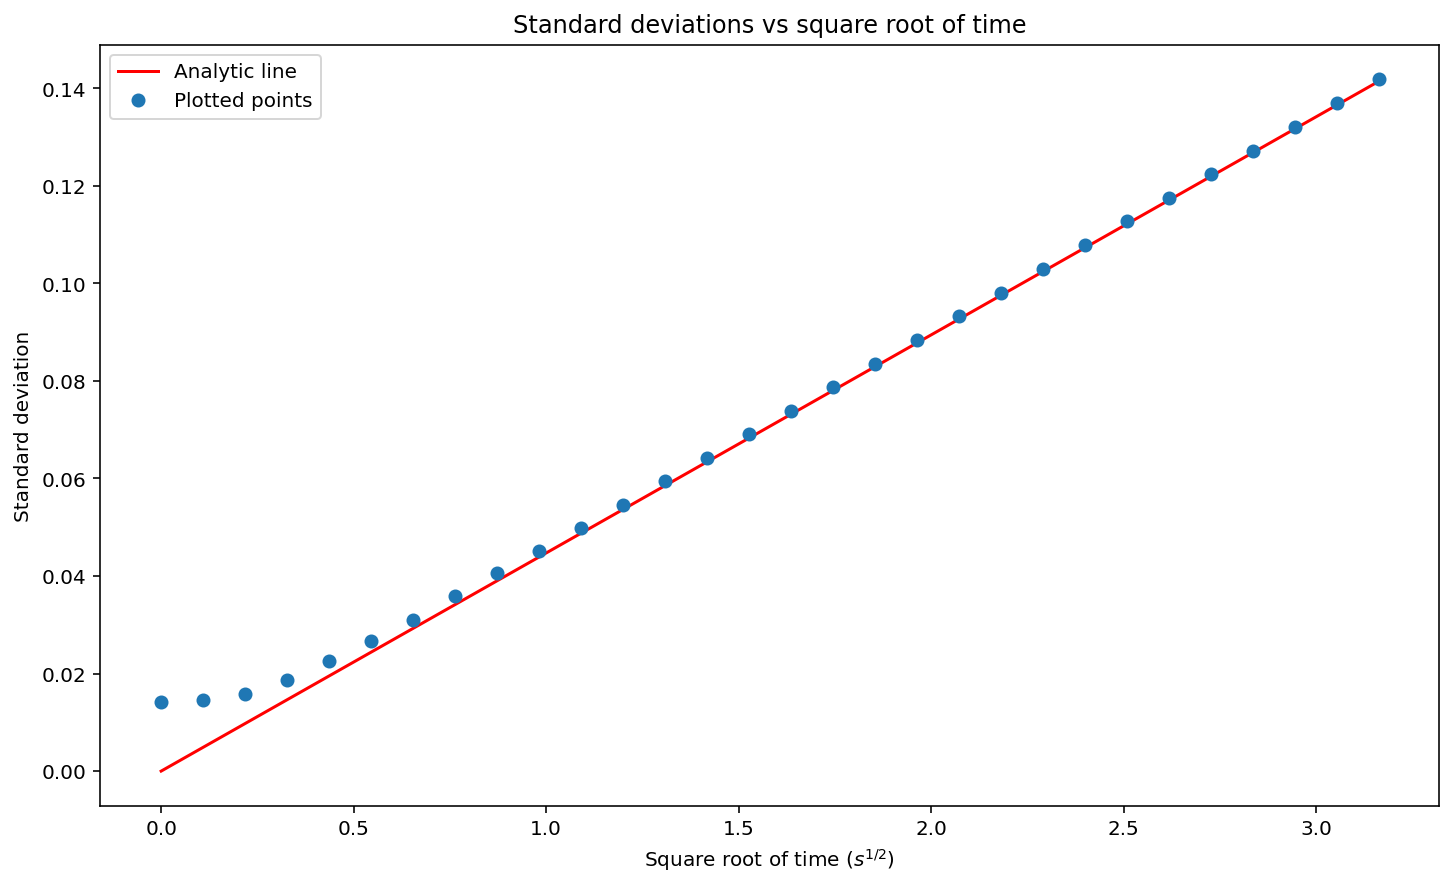

In [2]:
# plot of Gaussian width vs sqrt(t)
"""
This cell plots the standard deviations at different times as found in the
first cell. These values are plotted against evenly spaced square root values
of time.
The plotted values are then compared to a analytical line in the plot given by
y = sqrt(2*D*t)
"""

# time points to match indexed standard deviations
x = np.arange(30) * np.sqrt(10) / 29
y = np.array(sds)  # standard deviations
y_analytic = np.sqrt(2 * D) * x  # analytic standard deviation line

# PLOTTING ============

plt.plot(x, y_analytic, 'r-', label="Analytic line")
plt.plot(x, y, "o", label="Plotted points")
plt.title("Standard deviations vs square root of time")
plt.xlabel("Square root of time ($s^{1/2}$)")
plt.ylabel("Standard deviation")
plt.legend()
plt.show

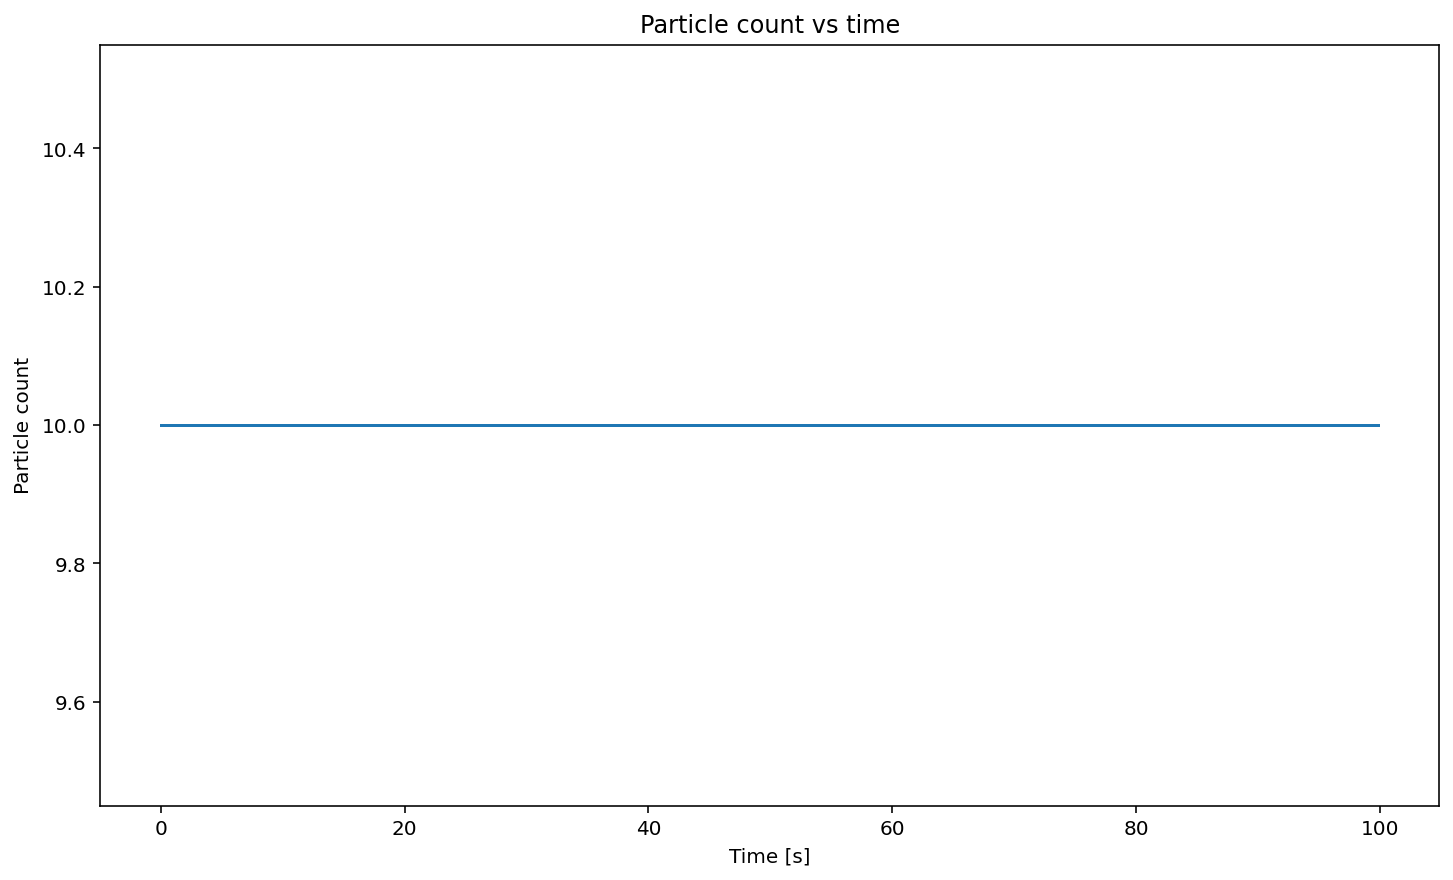

In [3]:
# This cell plots the particle count as found in the first cell versus time

t = np.arange(steps)[::333] / 100  # time steps to match indexed points

# PLOTTING ==========

plt.plot(t, cnt)
plt.title("Particle count vs time")
plt.xlabel("Time [s]")
plt.ylabel("Particle count")
plt.show()

In [4]:
# I DELETED EVERYTHING IN THIS SLIDE SO IT DOENS'T MESS ANYTHING ELSE UP :)


Using the above cell to experiment (we won't actually mark the code that's there)
Answer the following questions in the cell below:

5a) What happens to the animation when dt is too large? 

5b) What is the value of dt where the simulation diverges? 

5c) What is the value of $dt \, D/dx^2$ where the simulation starts to diverge? 

5d) What happens to the sums you generate for question (4) when the simulation diverges?  

5e) If you use a grid of only 51x51 points, where is the threshold for dt to converge now? 

Text answers to the above questions here

a) When dt is too large, one of two things happens to the animation. Either some overflow error occurs do to an extremely large or small
   value or the animation creates a perfect checkered pattern of yellow (high values) and purple (low values).

b) The value of dt where it divereges is approximately 0.024, anywhere above this, the checkerboard pattern becomes very apparent.

c) The value of $dt \frac{D}{dx^2}$ where it diverges is roughly 0.2448. This is found with D = 0.001 and dx = 1/101.

d) The sums from question (4) fluctuate heavily and don't remain remotely close to 10. The largest value of particles was $3 \times 10^{49}$ and the smallest value was $-8
\times 10^{50}$. This is clearly impossible. "You started with 10? Oh yeah??" *negatives your particles* "What now?"

e) After changing the grid to be 51x51 intead the value of dt at which it converges is around 0.095 any values below this an the checkered pattern is obvious.


# Acknowledgements
Please describe the role of **anyone other than yourself** who contributed to the work shown in this notebook. 

Its ok to get help from us and classmates! Please get in the habit of acknowledging such contributions.

If you want to refer to a classmate, please use only their cocalc email-id and not their name - or you could just say something like: "a classmate gave me the idea to use xxx feature to solve yyy problem."

Grey helped me understand the limitations of the method we used and how it caused particle count issues at the boundaries, because of this I was able to make my particle count plot *essentially* perfectly flat


All solution code for the main project question should appear above this cell.
Project extensions should appear in the cell below.

In [5]:
# OPTIONAL project extension (which can call functions in your code above if desired) here.
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

# Extension Description

Please describe any new language features or project extension you have implemented in this cell.



Code executes - grader use only

YOUR ANSWER HERE

In [6]:
# pep8 returns warnings or errors
nb_name = "project5.ipynb"
cells_to_check = []
cells_to_exclude = ['cell-style', 'cell-optimization0']
stop_at = ['cell-extension']

# check_style.py uses cells_to_check and nb_name
%run -i check_style2.py


checking cell: cell-proj6-1
checking cell: cell-proj6-2
checking cell: cell-proj6-3
checking cell: cell-proj6-4


<Figure size 864x504 with 0 Axes>

Results Grade - grader use only

YOUR ANSWER HERE

Comments, naming, readability - grader use only

YOUR ANSWER HERE

Plots - grader use only

YOUR ANSWER HERE

Code compactness and organization - grader use only

YOUR ANSWER HERE

Time for cell: cell-proj6-1 time: 32.90


<function matplotlib.pyplot.show(close=None, block=None)>

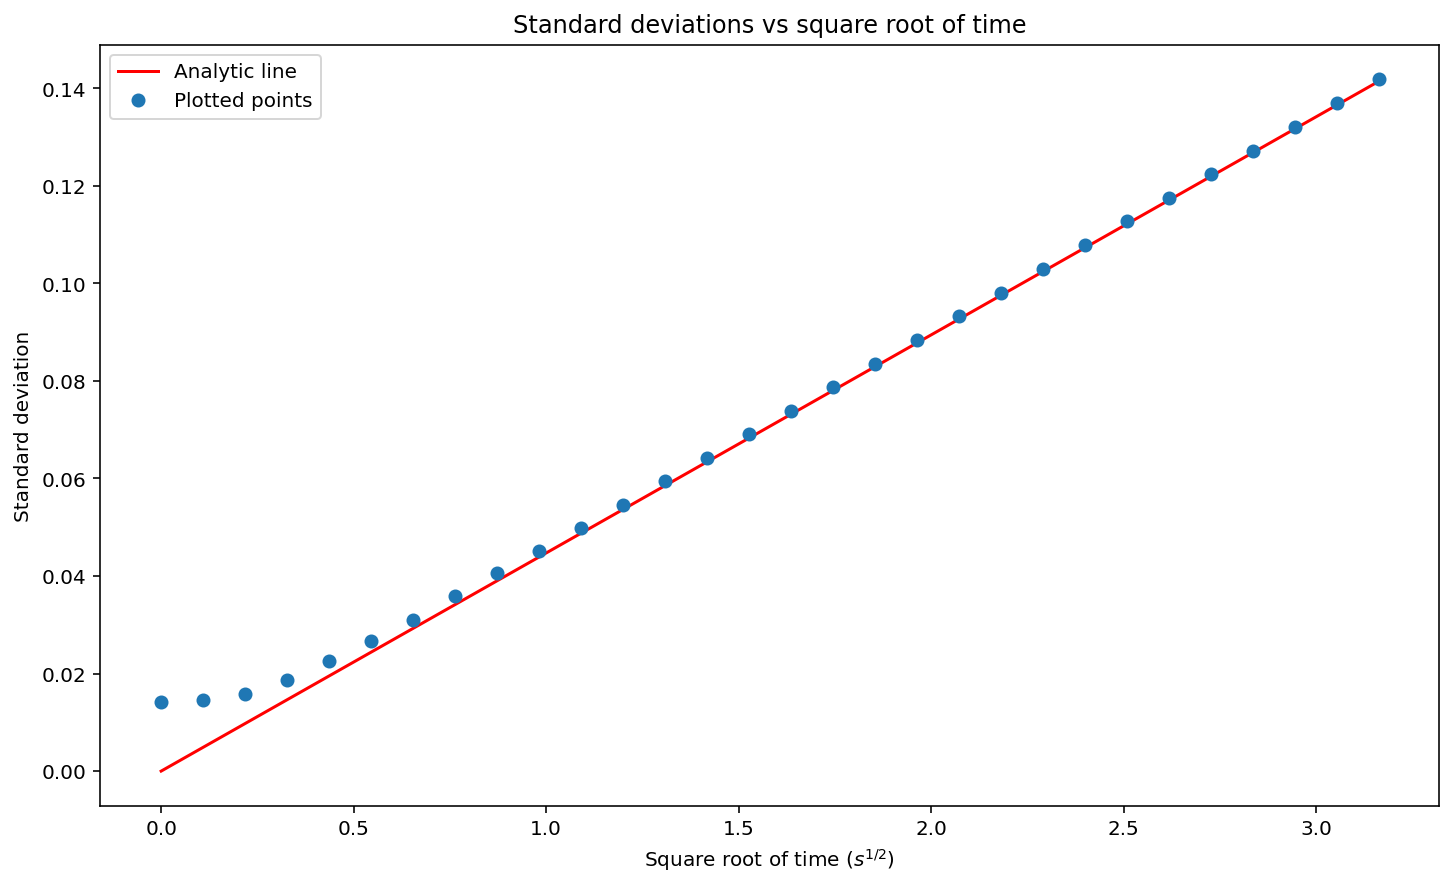

Time for cell: cell-proj6-2 time: 0.27


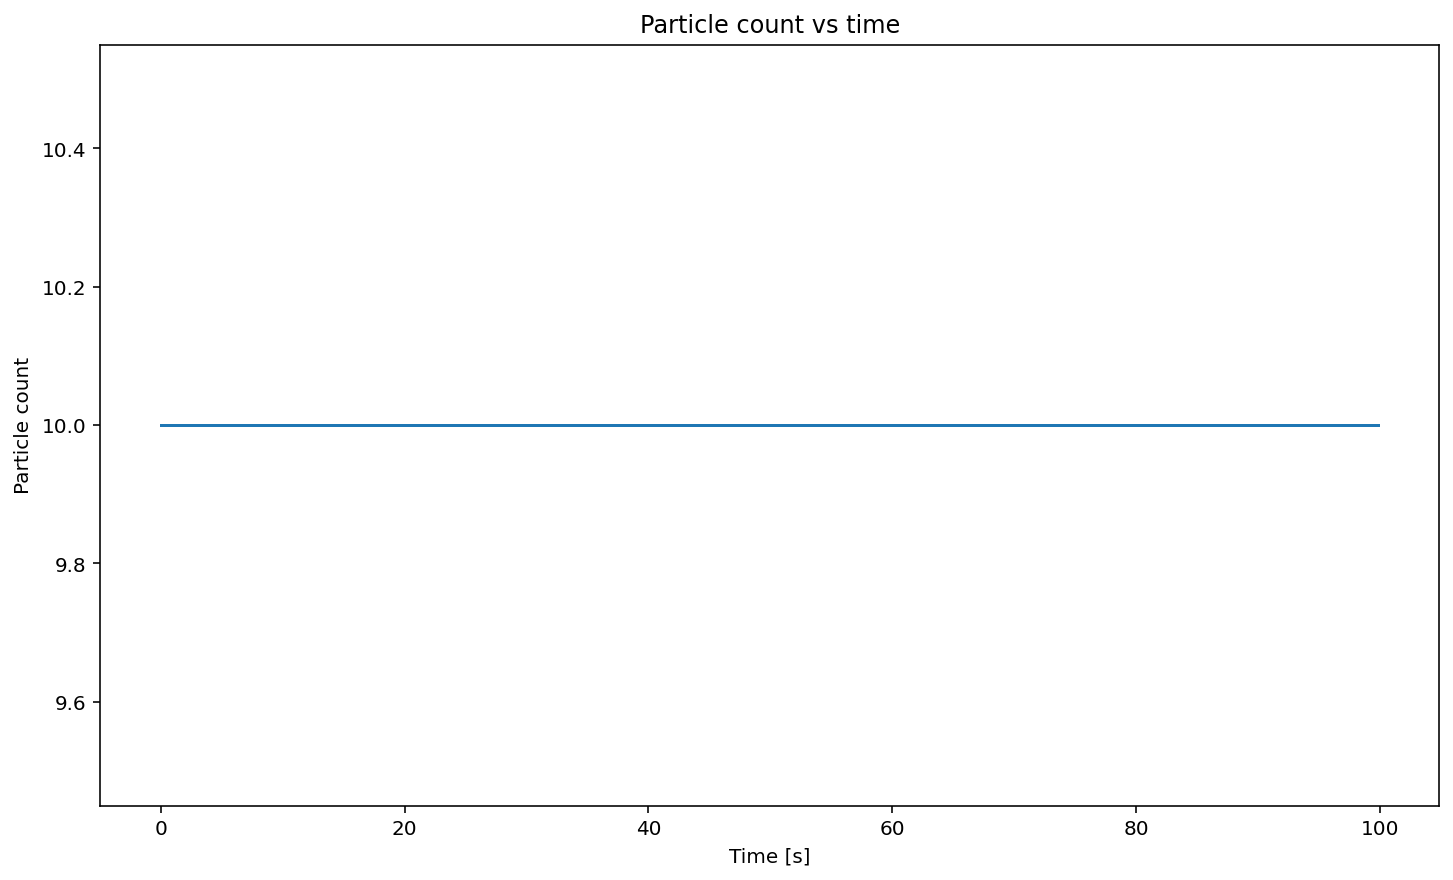

Time for cell: cell-proj6-3 time: 0.29
Time for cell: cell-proj6-4 time: 0.00
Total time: 33.47


<Figure size 864x504 with 0 Axes>

In [7]:
# Code optimization/speed
cells_to_time = []
cells_to_exclude = ['cell-style', 'cell-optimization0']
stop_at = ['cell-extension']
# also uses nb_name
%run -i time_cells2.py

Code optimization/timing - grader use only

YOUR ANSWER HERE

New Functionality/Language features - grader use only

YOUR ANSWER HERE